# Best Recommendation for Executives

Author: Yue Ling

Year: 2022



# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)
cursor = connection.cursor()

# How much and who are the biggest spending customers?

In [3]:
# this is biggest spenders as "best customers"
rollback_before_flag = True
rollback_after_flag = True

query = """

select c.customer_id , count(sa.sale_date) as num_visits, sum(sa.total_amount) as total_spent
from customers c
    join sales sa
        on c.customer_id = sa.customer_id

group by 1
having count(sa.sale_date) >= 1

order by 3 desc

"""
# customers who have bought something // 31047, customers who have never bought something: 35
# cuz doing join, only have sales more than 1 
my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,customer_id,num_visits,total_spent
0,30772,110,8328
1,30775,108,7908
2,30692,100,7860
3,30323,106,7848
4,28543,108,7848
...,...,...,...
31042,15264,12,708
31043,1528,16,684
31044,12861,14,672
31045,22530,14,648


# What meals are favoured over in the top 50 biggest spenders? 

In [4]:
# seeing what the top 50 biggest spenders like to buy 
rollback_before_flag = True
rollback_after_flag = True

query = """

select c.customer_id , count(sa.sale_date) as num_visits, sum(sa.total_amount) as total_spent,
    p.description as meals, sum(l.quantity) as meals_purchased
from customers c
    join sales sa
        on c.customer_id = sa.customer_id
    join line_items l
        on l.store_id = sa.store_id and sa.sale_id = l.sale_id 
    join products p 
        on p.product_id = l.product_id 

group by 1, p.description
having count(sa.sale_date) >= 1

order by sum(sa.total_amount) desc, sum(l.quantity) desc
limit 50



"""
# customers who have bought something // 31047, customers who have never bought something: 35
# cuz doing join, only have sales more than 1 
df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,customer_id,num_visits,total_spent,meals,meals_purchased
0,30772,83,7092,Pistachio Salmon,167
1,30692,80,6756,Pistachio Salmon,162
2,30772,81,6744,Curry Chicken,131
3,29874,81,6732,Pistachio Salmon,154
4,30595,80,6624,Pistachio Salmon,152
5,30323,79,6600,Pistachio Salmon,161
6,30775,80,6588,Pistachio Salmon,145
7,30959,81,6540,Pistachio Salmon,155
8,30861,81,6504,Pistachio Salmon,154
9,30775,80,6492,Eggplant Lasagna,147


# Pistachio Salmon (the most-selling item) preferred meal for all spending groups?

Even amongst the less spending customers, about 20% of the purchases are from buying the Salmon. This means that amongst the different value classes of customers, the Pistachio Salmon is their favourite. 

In [5]:
# looking at the proportion of sales from different spending group regarding pistachio salmon
# total spent / 12 == meals sold in total to that customer 
rollback_before_flag = True
rollback_after_flag = True

query = """

select c.customer_id , count(sa.sale_date) as num_visits, sum(sa.total_amount) as total_spent,
    p.description as meals, sum(l.quantity) as total_pistachio_salmon_meals_purchased,
    sum(sa.total_amount) / 12 as total_meal_purchased, 
    (sum(l.quantity) / sum(sa.total_amount) / 12) * 100 as perc_pistachio
from customers c
    join sales sa
        on c.customer_id = sa.customer_id
    join line_items l
        on l.store_id = sa.store_id and sa.sale_id = l.sale_id 
    join products p 
        on p.product_id = l.product_id 

group by 1, p.description
having count(sa.sale_date) >= 1 and p.description = 'Pistachio Salmon'

order by sum(sa.total_amount) desc, sum(l.quantity) desc



"""
# customers who have bought something // 31047, customers who have never bought something: 35
# cuz doing join, only have sales more than 1 
df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,customer_id,num_visits,total_spent,meals,total_pistachio_salmon_meals_purchased,total_meal_purchased,perc_pistachio
0,30772,83,7092,Pistachio Salmon,167,591,0.196230
1,30692,80,6756,Pistachio Salmon,162,563,0.199822
2,29874,81,6732,Pistachio Salmon,154,561,0.190632
3,30595,80,6624,Pistachio Salmon,152,552,0.191224
4,30323,79,6600,Pistachio Salmon,161,550,0.203283
...,...,...,...,...,...,...,...
31042,25924,7,432,Pistachio Salmon,10,36,0.192901
31043,12861,6,420,Pistachio Salmon,7,35,0.138889
31044,13929,6,408,Pistachio Salmon,13,34,0.265523
31045,16547,7,372,Pistachio Salmon,10,31,0.224014


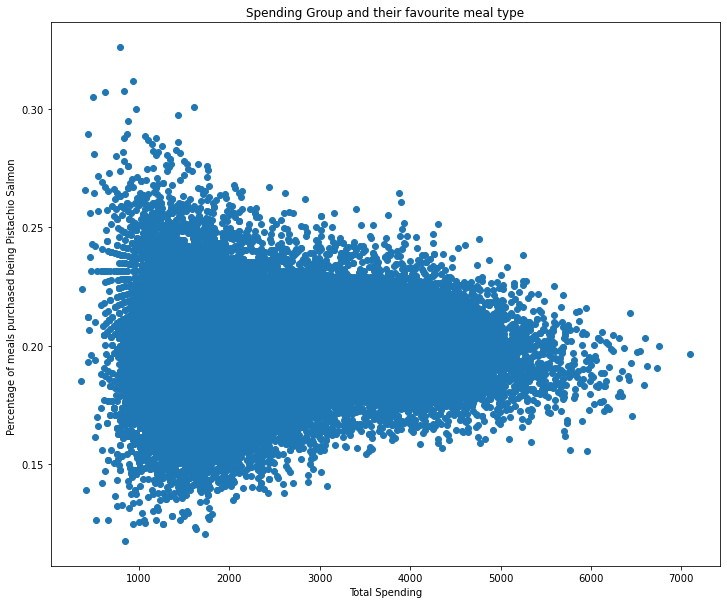

In [6]:
# no matter the spending group, pistachio salmon is the most popular

plt.figure (figsize=(12,10))
plt.scatter(df.total_spent, df.perc_pistachio)
plt.title('Spending Group and their favourite meal type')
plt.xlabel('Total Spending')
plt.ylabel('Percentage of meals purchased being Pistachio Salmon ')
plt.show()

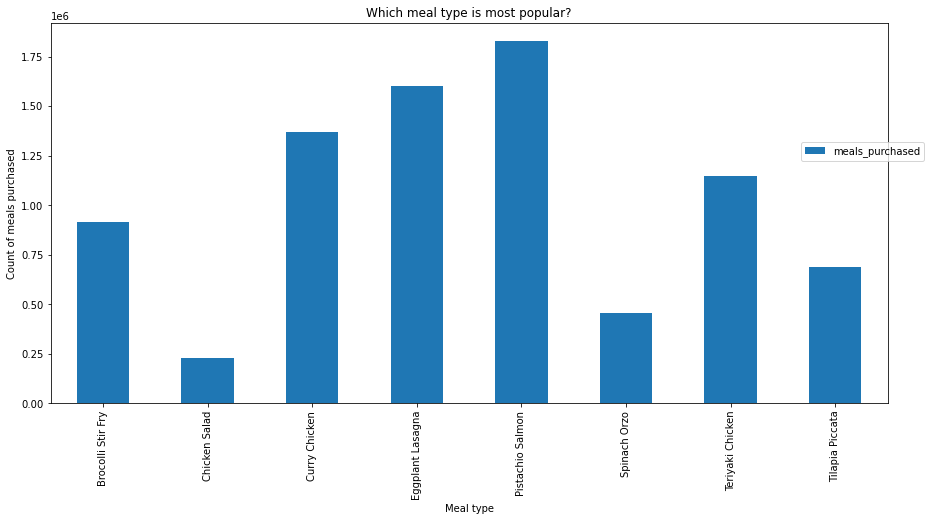

In [7]:
#what's best selling in general 
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(l.quantity) as meals_purchased, p.description as meals
from line_items l
join products p
on p.product_id = l.product_id
group by 2
order by 2

"""
#can also do count(*)

df1 = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df1


df1.plot.bar(figsize=(15,7))

plt.title('Which meal type is most popular?')
plt.xlabel('Meal type')
plt.ylabel('Count of meals purchased')

plt.xticks(np.arange(8), labels=df1['meals'])
plt.legend(bbox_to_anchor=(1.05, 0.7))
plt.show()

# Executive Summary


From the above figures, we know that the customers like Pistachio Salmons the most. This is true for all different spending group as shown in the Pistachio Salmon sales, which  consists of on average about 20% of all meals sold. 

## The following are my main 2 recommendations:
1) AGM can do a rewards / rebate program. For example, for every 10 meals bought, the customers can earn some rewards point and exchange for some free Pistachio Salmon meals. This rewards system would favour the ones that purhcase more and in turn generate more interests and sales. The reasoning behind this is to make the customers "yearn" to get to the top and collect more points / stickers / stamp on their rewards card - as if they were playing a game. Furthermore, customers may also round up their quantity of purchases to make the 10 meals minimum. For example, if they intended to buy 8 meals, but see the reward system minimum of 10 meals purchase, these customers may add 2 more meals to their purchase. 

- Have a expiry date on the rewards point. To further drive the "gaming" mentality, AGM could implement an expiry on the rewards point to further incentivize individuals to meet the threshold purchase amount in a timely manner. This helps ensure recency, frequency and monetary value of the customer by bringing in customers in a consistent stream in the near future. 

- AGM should also consider sending clients updates about new promotions and about the upcoming expiry of their meal purchases. These reminders may bring in recurring and higher frequency travels in the stores and generate more sales. Once the customers come into the store, the smell and sight of food, suck-cost fallacy, rewards point system, and the fast depleting energy from doing the strenuous exercise of shopping all calls for more purchases! 

2) Sell similar type of food items to Pistachio Salmon. AGM can consider carrying more seafood item (e.g. sushi, tuna bowls...etc.) and/ or similarly flavoured cusine. This way the food selection will more align with the taste of the customers. However, such move should be implemented with some other surveys and market analysis on the newly introduced product. 

- To extend on (2), it would be wise to change up the menu items (maybe replace the less popular food item like Chicken salad) and keep the customers surprised with the changing menu. This would help ensure high sales of the carried food items and replace the less popular items. 

